In [27]:
from IPython.display import display
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [28]:
dists = ['rand', 'myDist', 'truncNormal', 'truncNormalBump']
data = {}

for dist in dists:
    data[dist] = pd.read_csv(f'{dist}.csv')
    data[dist]['chbshvC+'] = data[dist]['meanC'] + data[dist]['chbshvC']
    data[dist]['chbshvC-'] = data[dist]['meanC'] - data[dist]['chbshvC']
    data[dist]['expC+'] = data[dist]['meanC'] + data[dist]['expC']
    data[dist]['expC-'] = data[dist]['meanC'] - data[dist]['expC']
    data[dist]['expT+'] = data[dist]['meanT'] + data[dist]['expT']
    data[dist]['expT-'] = data[dist]['meanT'] - data[dist]['expT']

<Axes: title={'center': '# of comparisons'}, xlabel='n'>

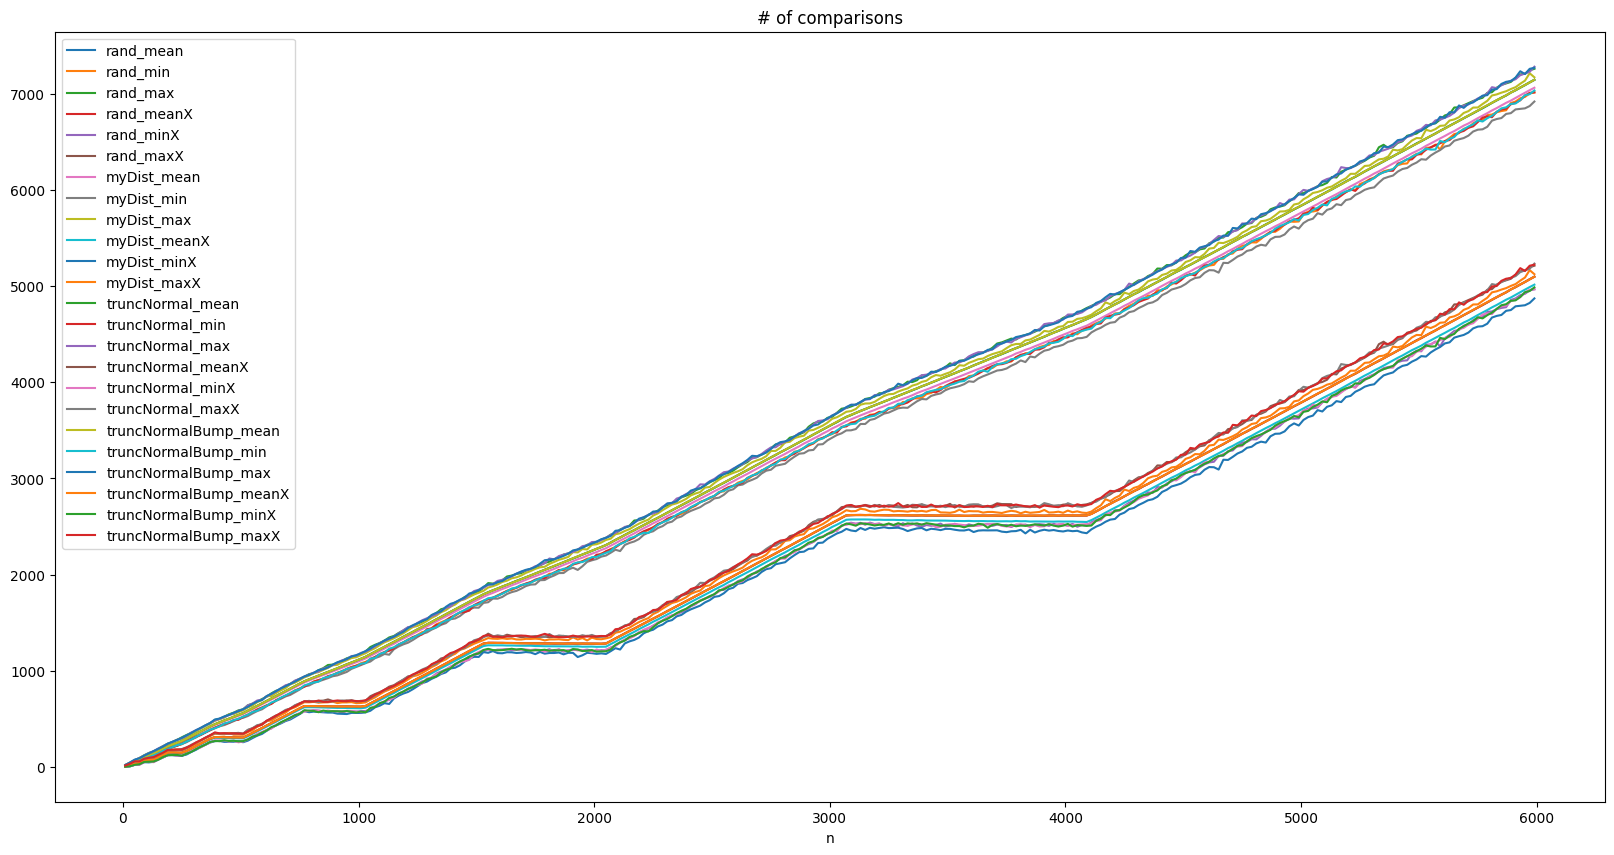

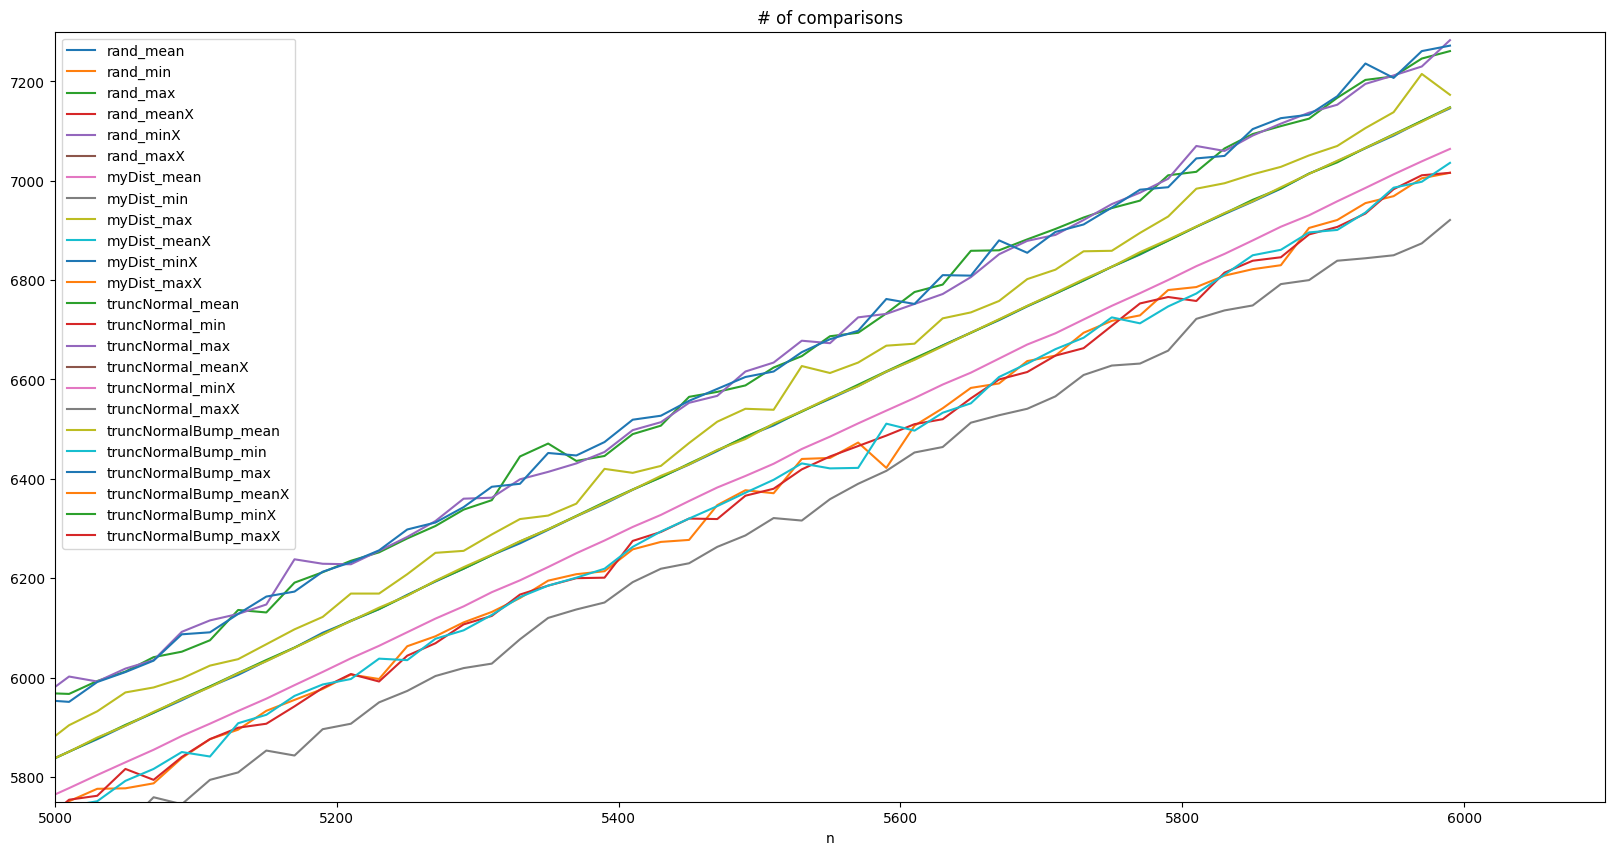

In [29]:
cmps_df = pd.DataFrame()
cmps_df['n'] = data['rand']['n']
for dist in dists:
    cmps_df[f'{dist}_mean'] = data[dist]['meanC']
    cmps_df[f'{dist}_min'] = data[dist]['minC']
    cmps_df[f'{dist}_max'] = data[dist]['maxC']
    cmps_df[f'{dist}_meanX'] = data[dist]['meanCX']
    cmps_df[f'{dist}_minX'] = data[dist]['minCX']
    cmps_df[f'{dist}_maxX'] = data[dist]['maxCX']

cmps_df.plot(x='n', title='# of comparisons', figsize=(20,10))
cmps_df.plot(x='n', title='# of comparisons', figsize=(20,10), xlim=(5000,6100), ylim=(5750,7300))


<Axes: title={'center': '# of comparisons'}, xlabel='n'>

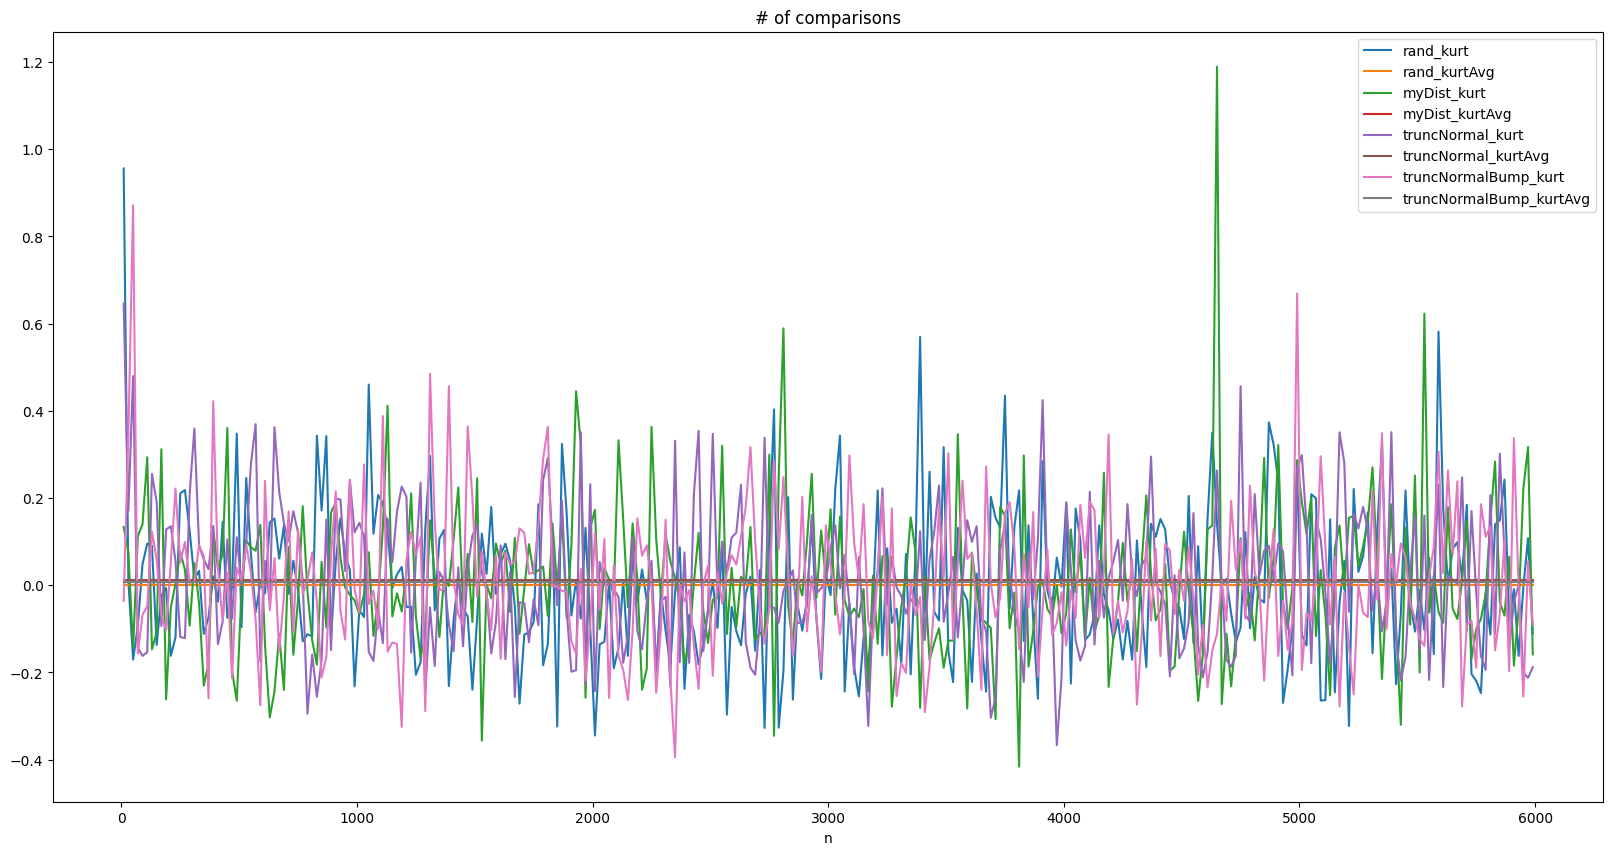

In [30]:
for dist in dists:
    cmps_df[f'{dist}_kurt'] = data[dist]['kurtC']
    cmps_df[f'{dist}_kurtAvg'] = data[dist]['kurtC'].mean()

cmps_df.plot(x='n', y=[f(dist) for dist in dists for f in (lambda x:f'{x}_kurt', lambda x:f'{x}_kurtAvg')], title='# of comparisons', figsize=(20,10))

<Axes: title={'center': '# of comparisons/1.16*n'}, xlabel='n'>

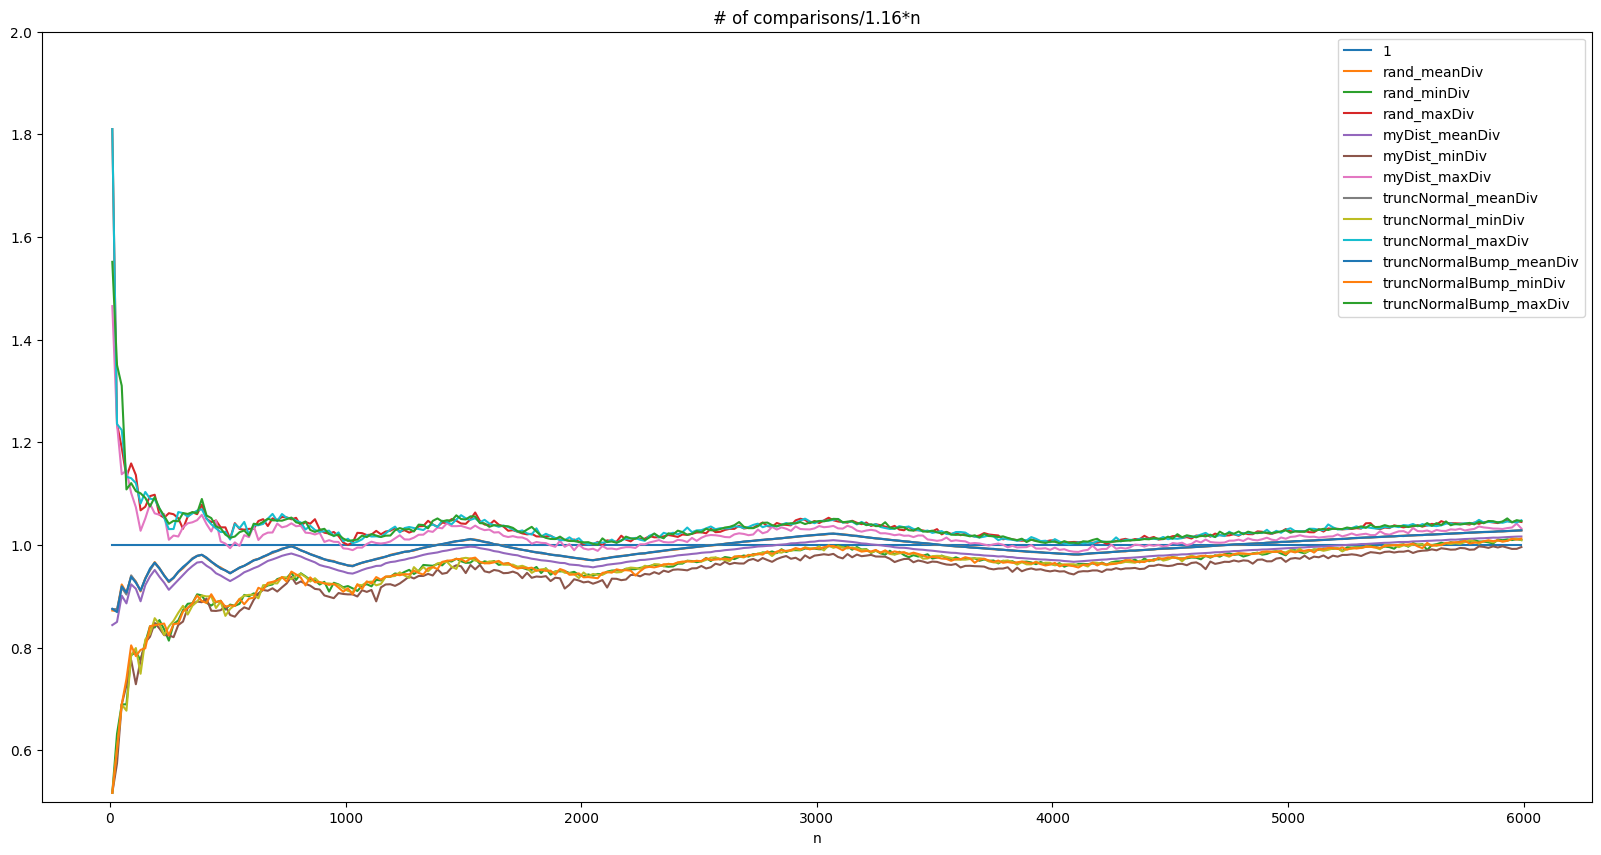

In [31]:
cmps_df = cmps_df.assign(an=lambda x: 1.16*x.n)
cmpsDiv_df = pd.DataFrame()
cmpsDiv_df['n'] = data['rand']['n']
cmpsDiv_df['1'] = 1
for dist in dists:
    cmpsDiv_df[f'{dist}_meanDiv'] = cmps_df[f'{dist}_mean']/cmps_df['an']
    cmpsDiv_df[f'{dist}_minDiv'] = cmps_df[f'{dist}_min']/cmps_df['an']
    cmpsDiv_df[f'{dist}_maxDiv'] = cmps_df[f'{dist}_max']/cmps_df['an']

cmpsDiv_df.plot(x='n', title='# of comparisons/1.16*n', figsize=(20,10), ylim=(0.5,2))

<Axes: title={'center': 'mininum distance'}, xlabel='n'>

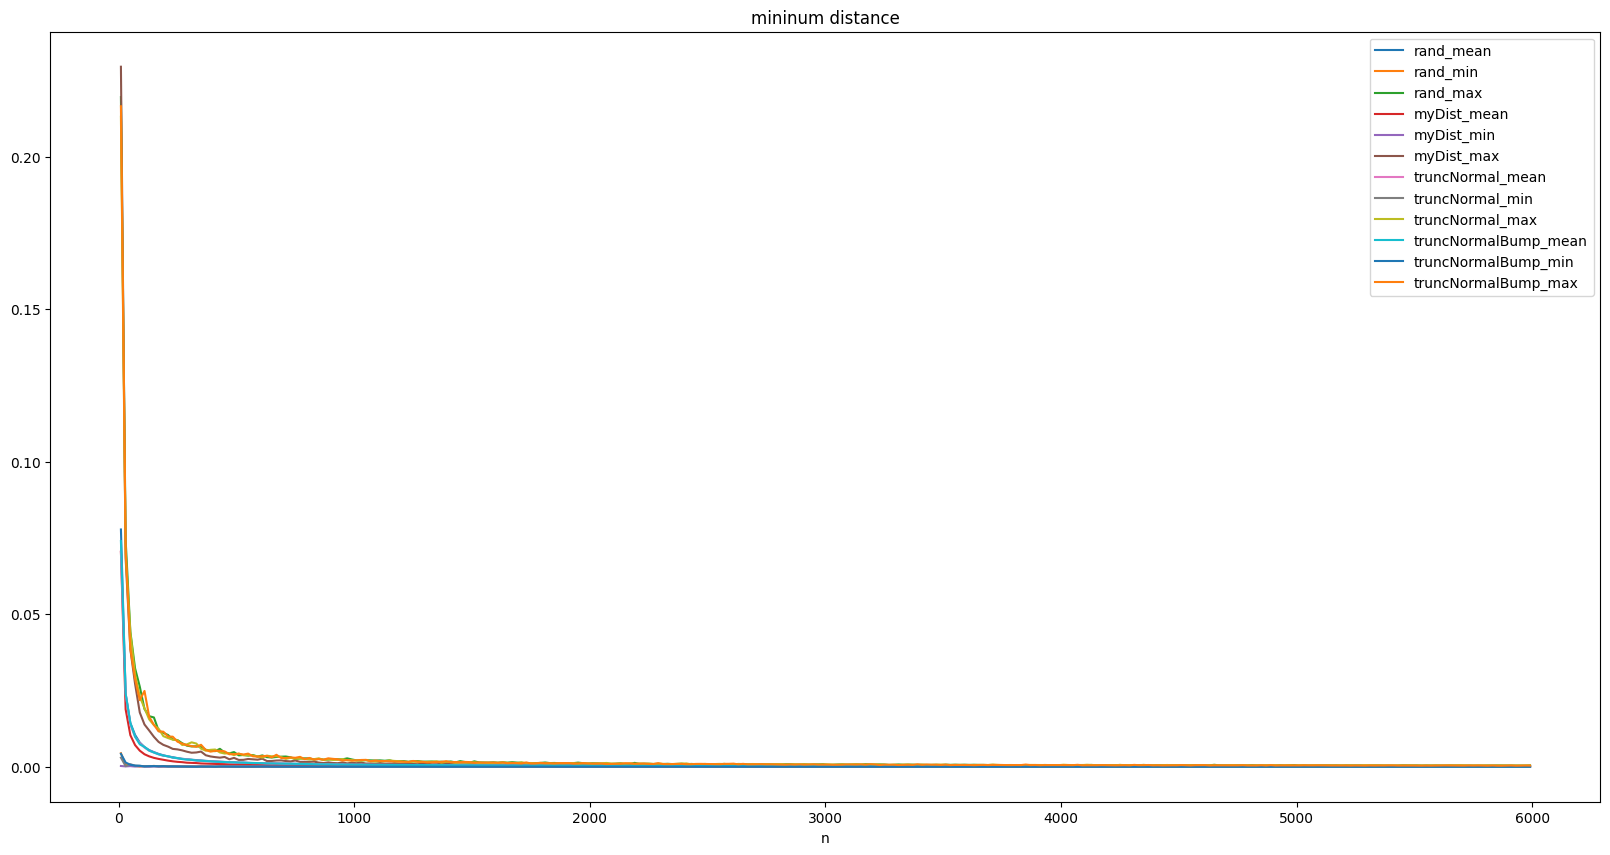

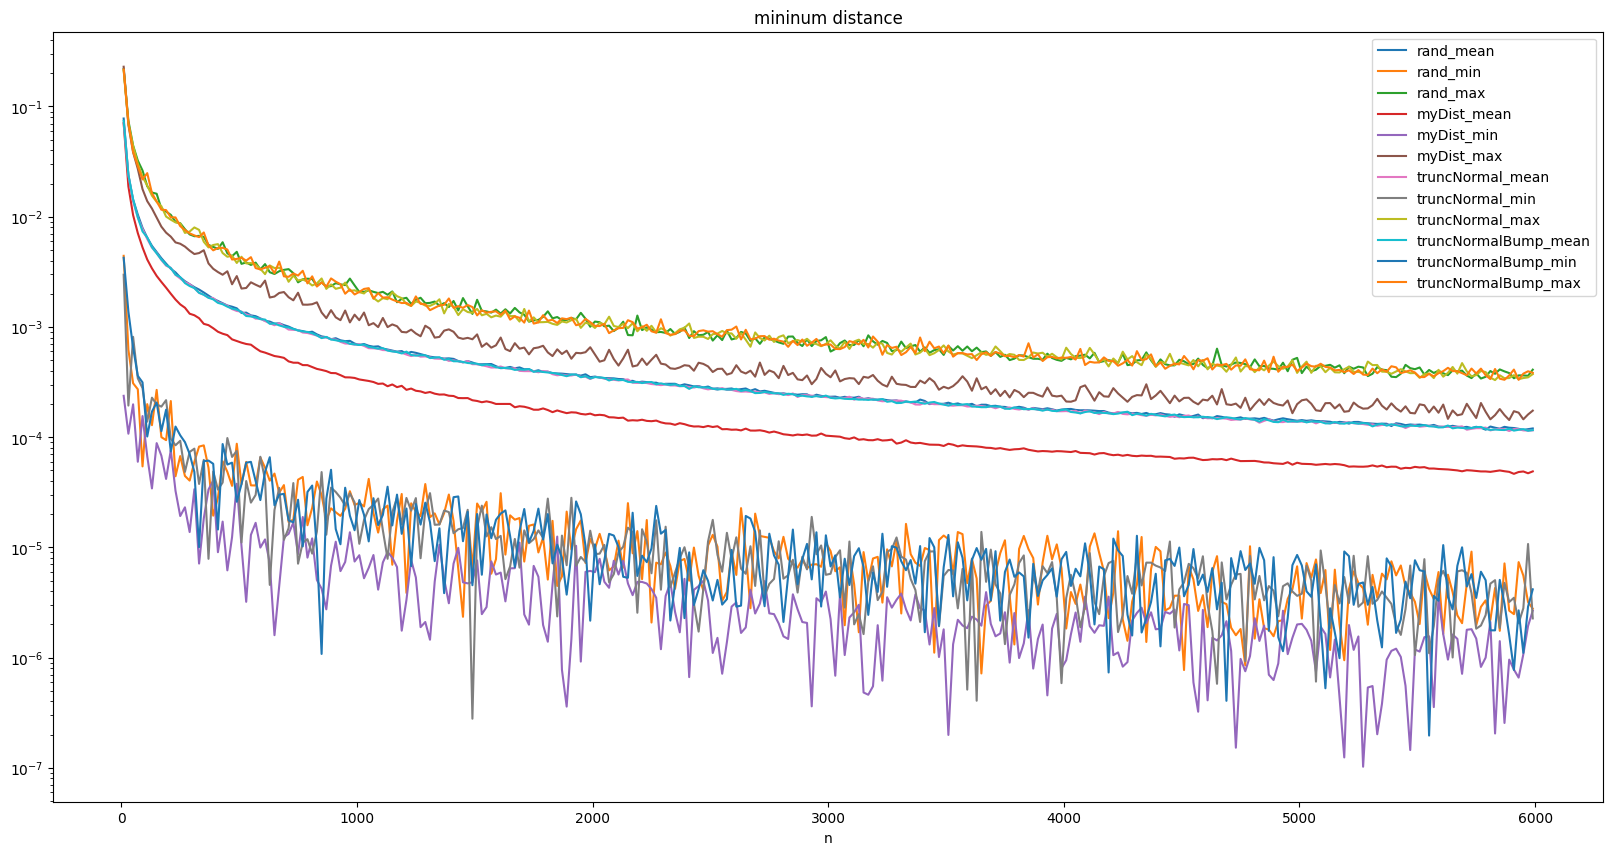

In [32]:
dist_df = pd.DataFrame()
dist_df['n'] = data['rand']['n']
for dist in dists:
    dist_df[f'{dist}_mean'] = data[dist]['meanD']
    dist_df[f'{dist}_min'] = data[dist]['minD']
    dist_df[f'{dist}_max'] = data[dist]['maxD']

dist_df.plot(x='n', title='mininum distance', figsize=(20,10))
dist_df.plot(x='n', title='mininum distance', figsize=(20,10), logy=True)

<Axes: title={'center': 'time'}, xlabel='n'>

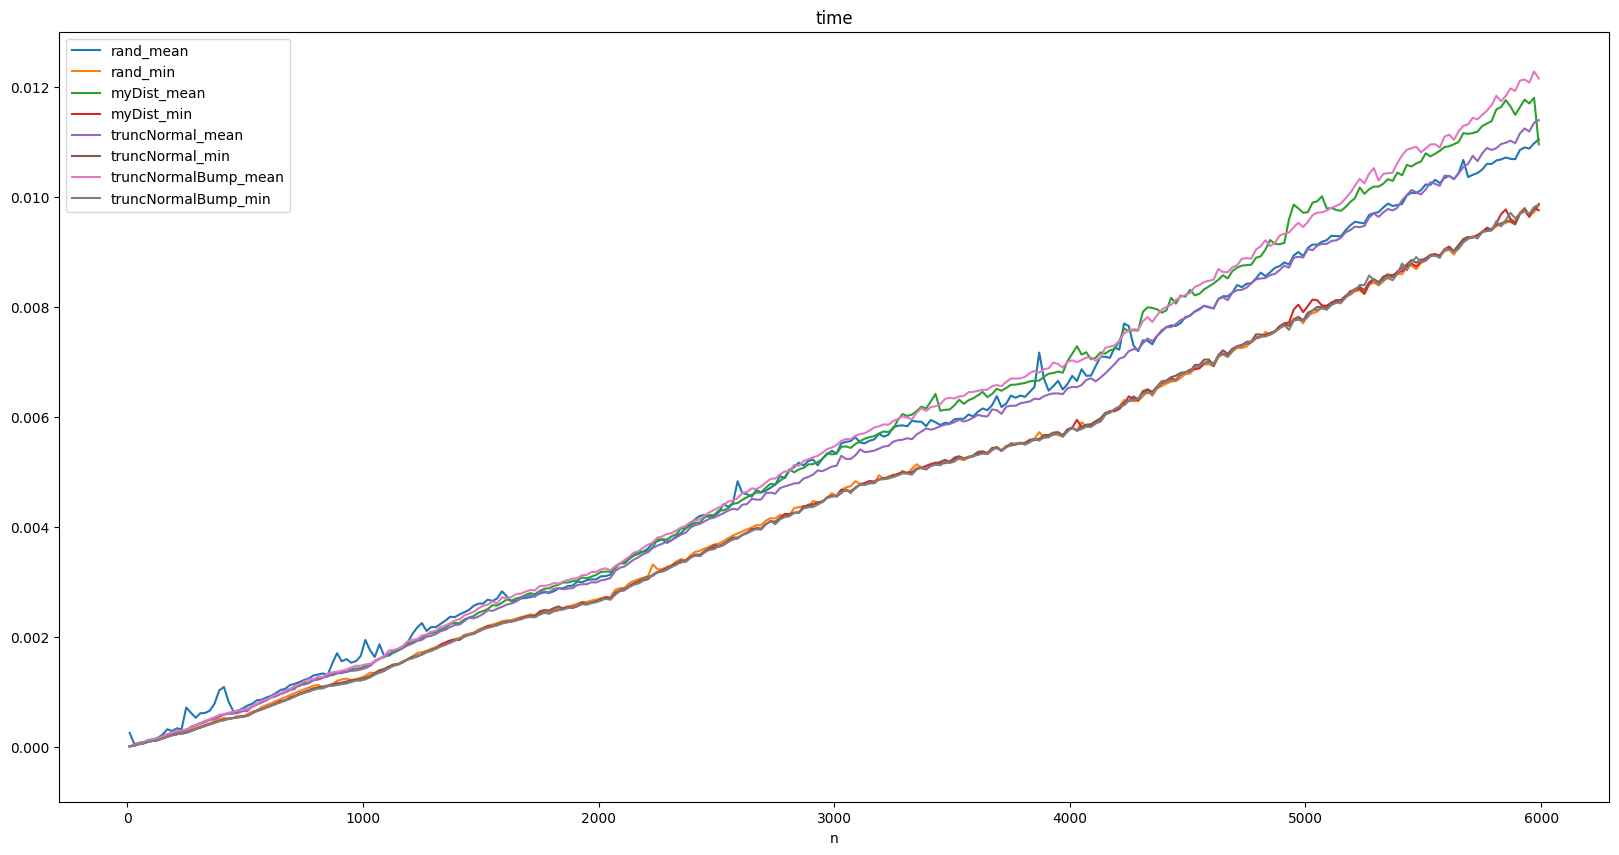

In [33]:
time_df = pd.DataFrame()
time_df['n'] = data['rand']['n']
for dist in dists:
    time_df[f'{dist}_mean'] = data[dist]['meanT']
    time_df[f'{dist}_min'] = data[dist]['minT']

time_df.plot(x='n', title='time', figsize=(20,10), ylim=(-0.001,0.013))


<Axes: title={'center': 'time/1.5e-7*nlogn+6e-8*n+2e-6*n'}, xlabel='n'>

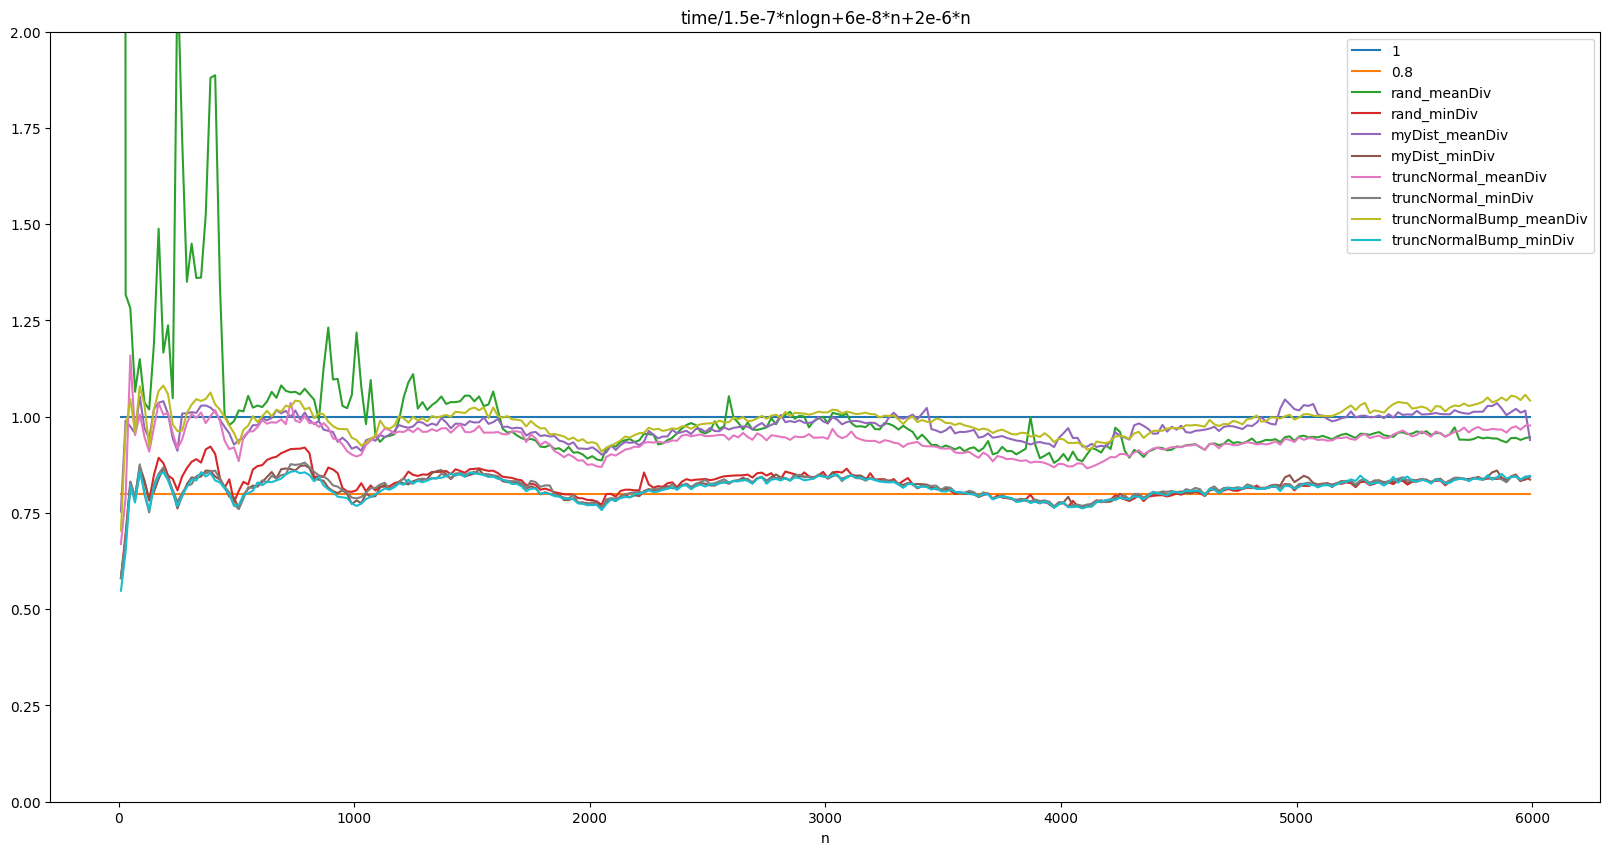

In [34]:
time_df = time_df.assign(nlogn=lambda x: 1.5e-7*np.log2(x.n)*x.n + 6e-8*x.n + 2e-6*np.log2(x.n))
timeDiv_df = pd.DataFrame()
timeDiv_df['n'] = data['rand']['n']
timeDiv_df['1'] = 1
timeDiv_df['0.8'] = 0.8
for dist in dists:
    timeDiv_df[f'{dist}_meanDiv'] = time_df[f'{dist}_mean']/time_df['nlogn']
    timeDiv_df[f'{dist}_minDiv'] = time_df[f'{dist}_min']/time_df['nlogn']

timeDiv_df.plot(x='n', title='time/1.5e-7*nlogn+6e-8*n+2e-6*n', figsize=(20,10), ylim=(0,2))

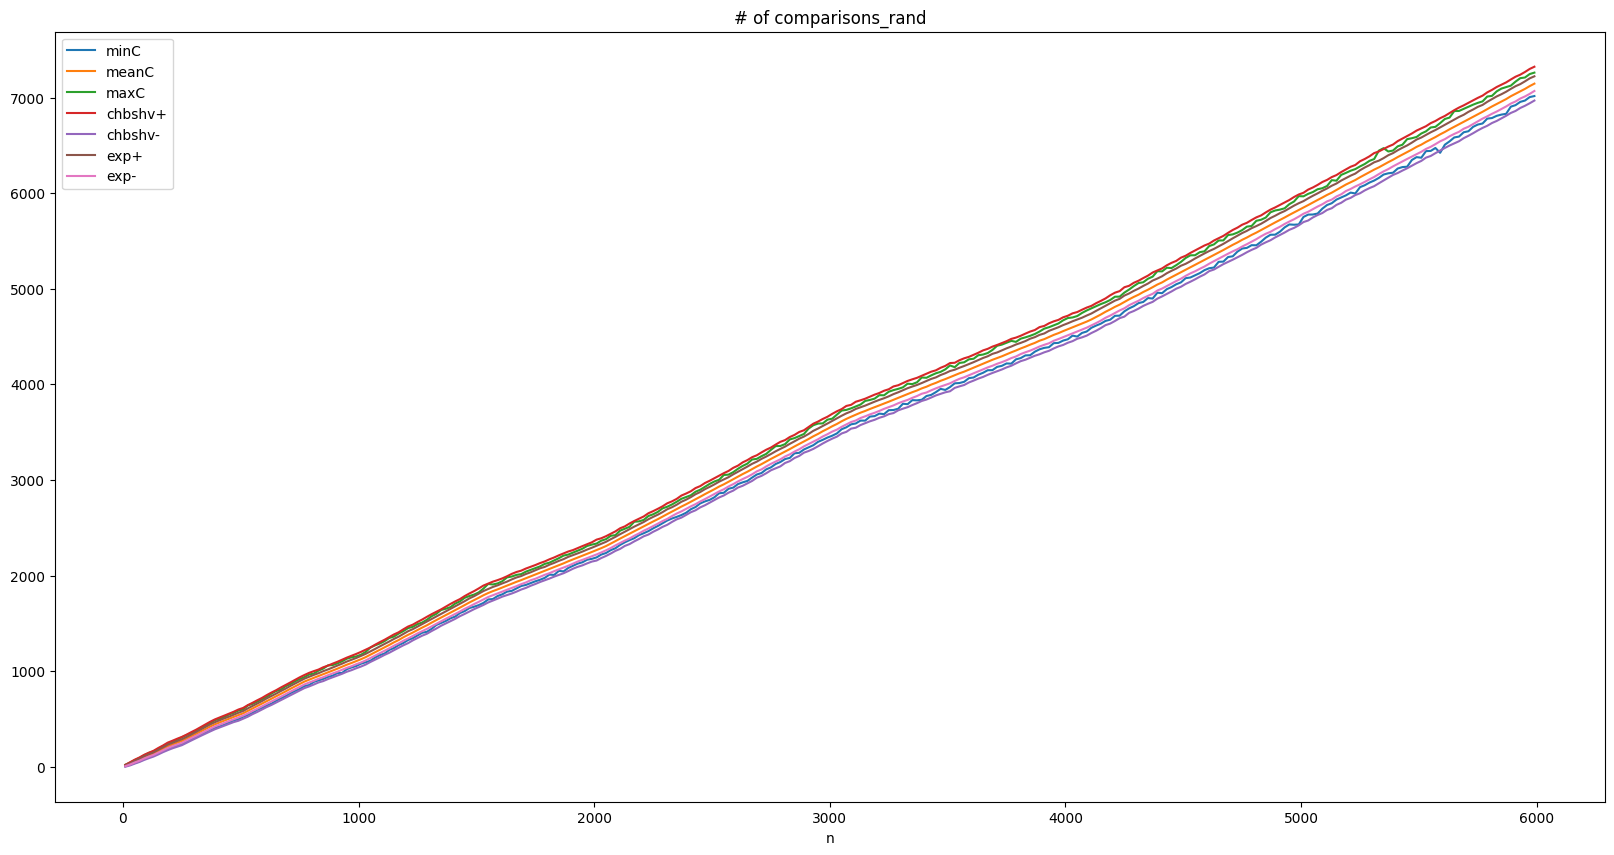

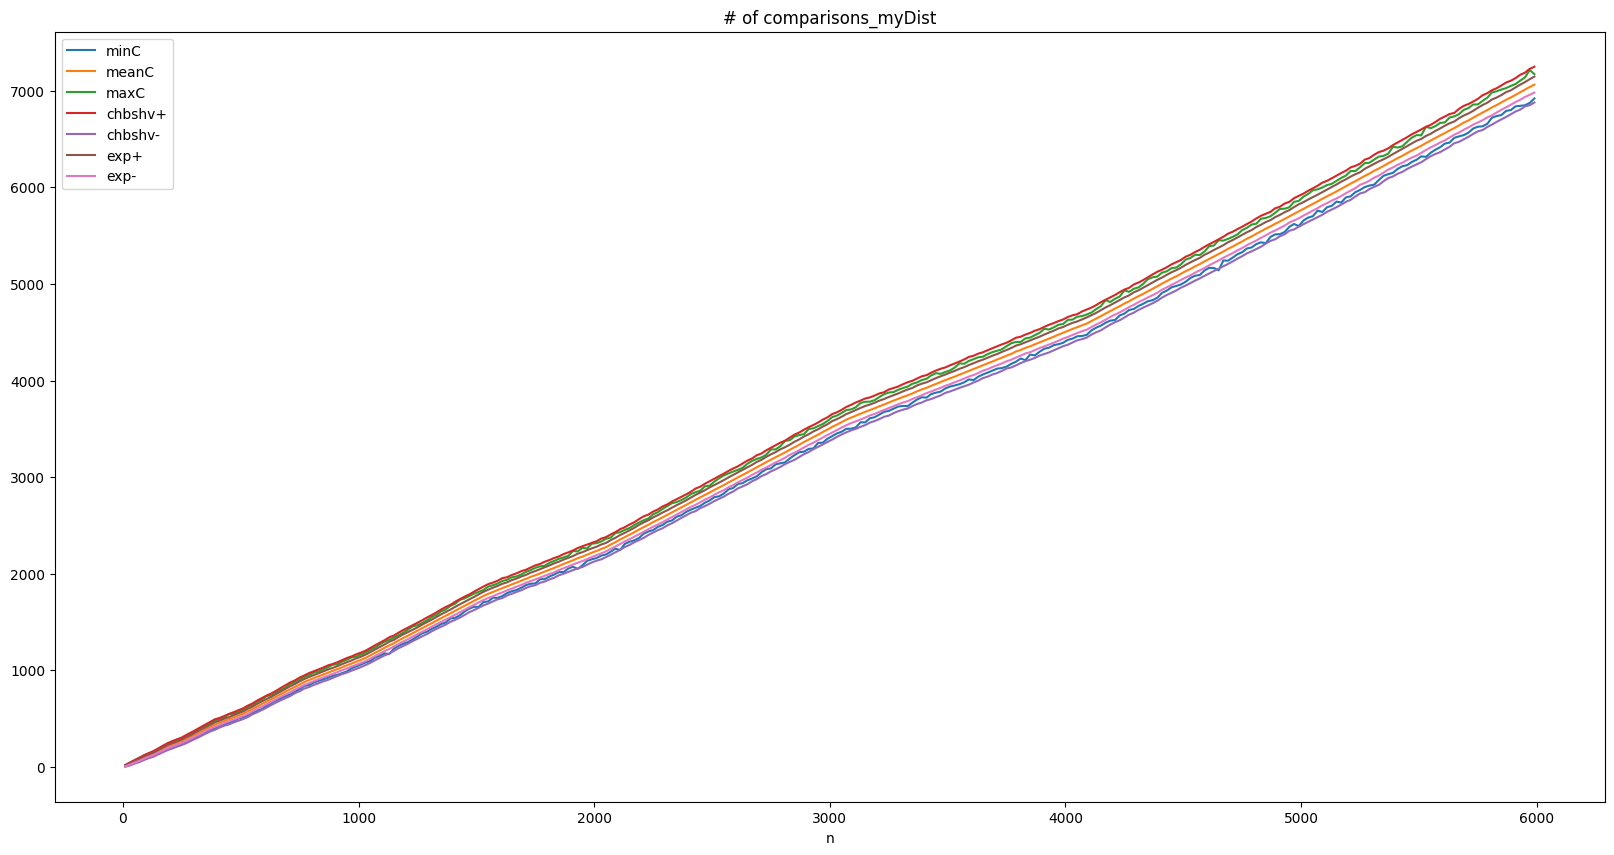

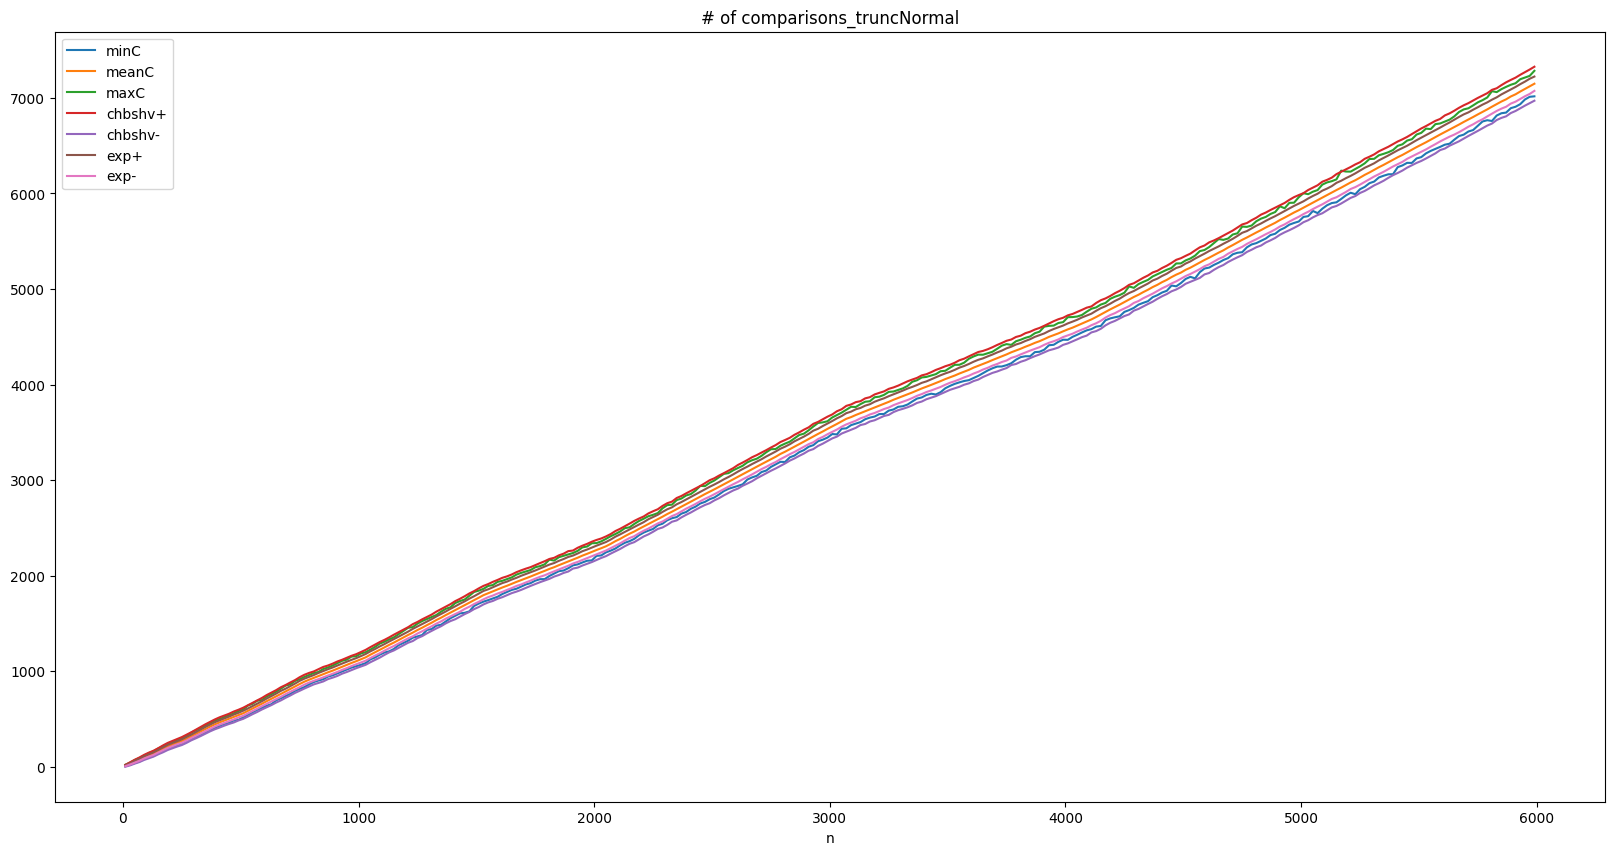

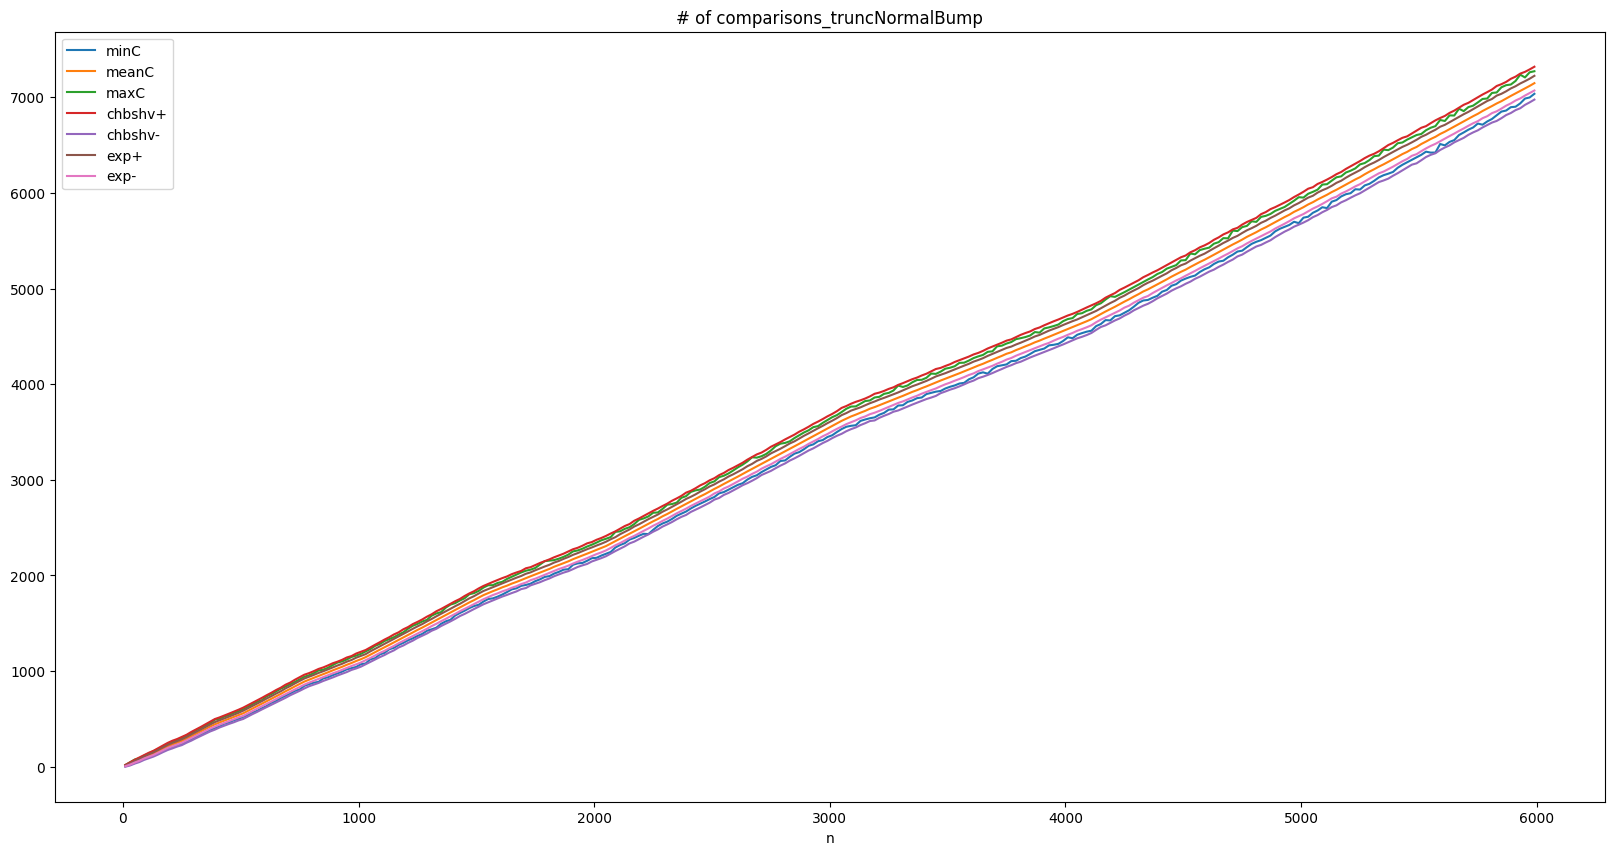

In [35]:
for dist in dists:
    data[dist]['chbshv+'] = data[dist]['meanC'] + data[dist]['chbshvC']
    data[dist]['chbshv-'] = data[dist]['meanC'] - data[dist]['chbshvC']
    data[dist]['exp+'] = data[dist]['meanC'] + data[dist]['expC']
    data[dist]['exp-'] = data[dist]['meanC'] - data[dist]['expC']
    data[dist].plot(x='n', y=['minC', 'meanC', 'maxC', 'chbshv+', 'chbshv-', 'exp+', 'exp-'], figsize=(20,10), title=f'# of comparisons_{dist}')

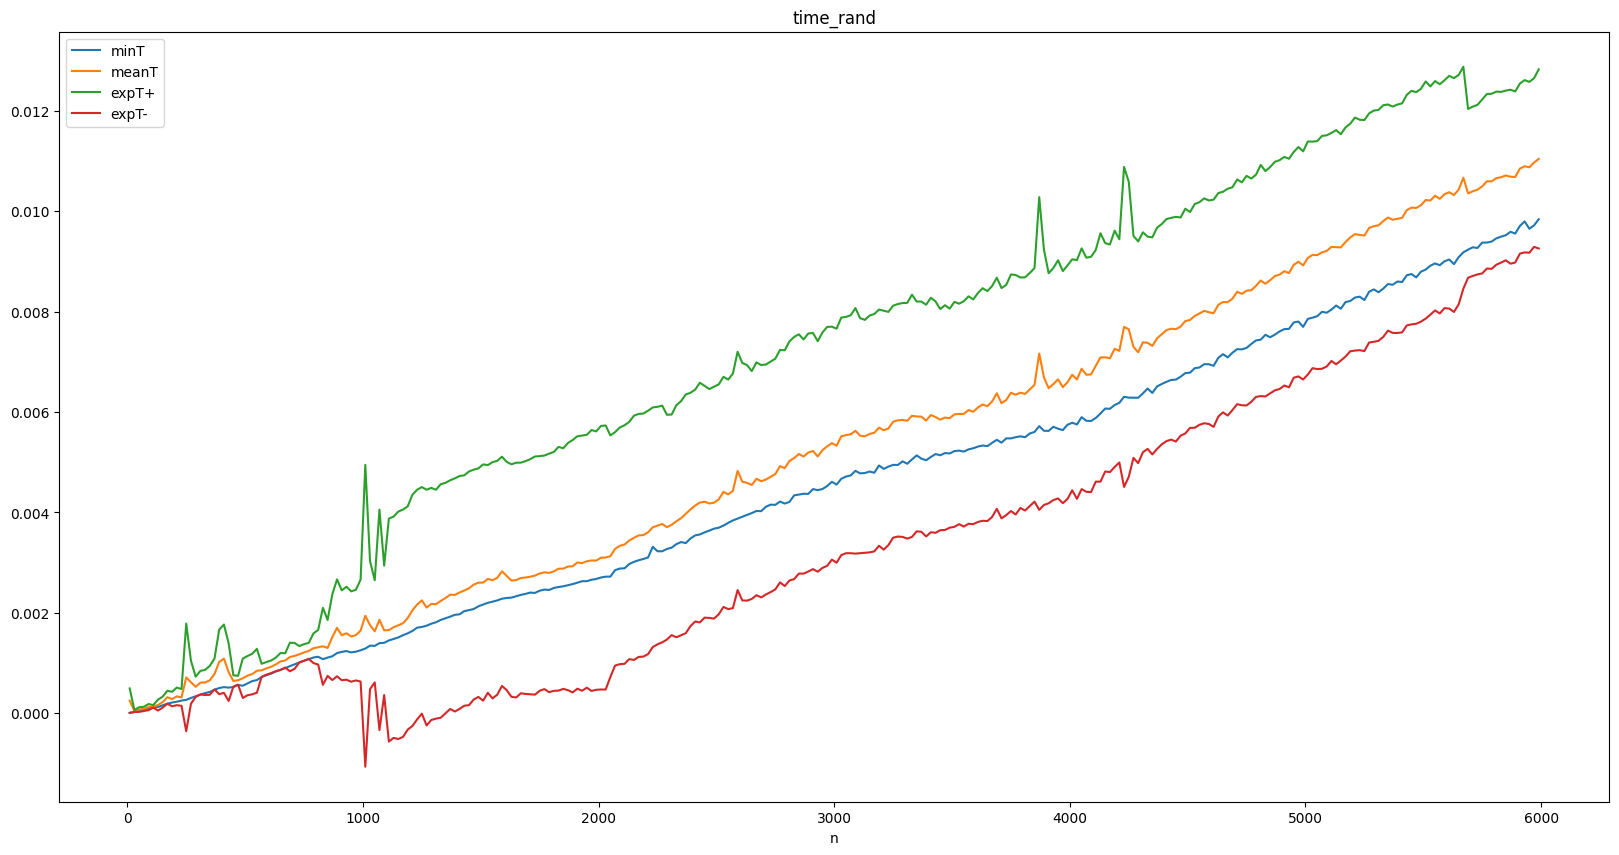

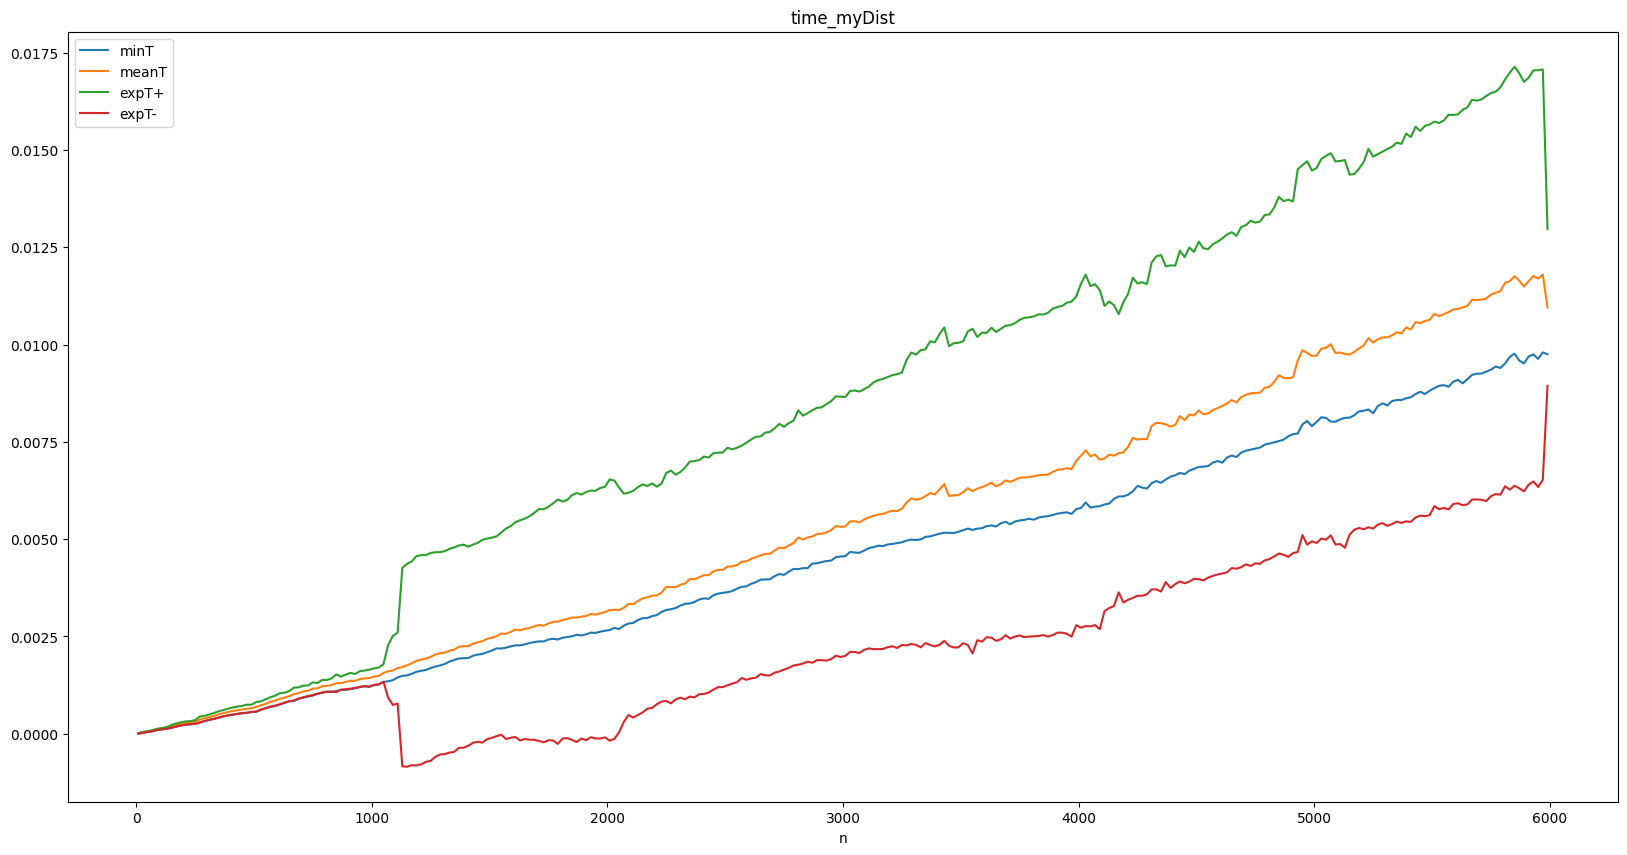

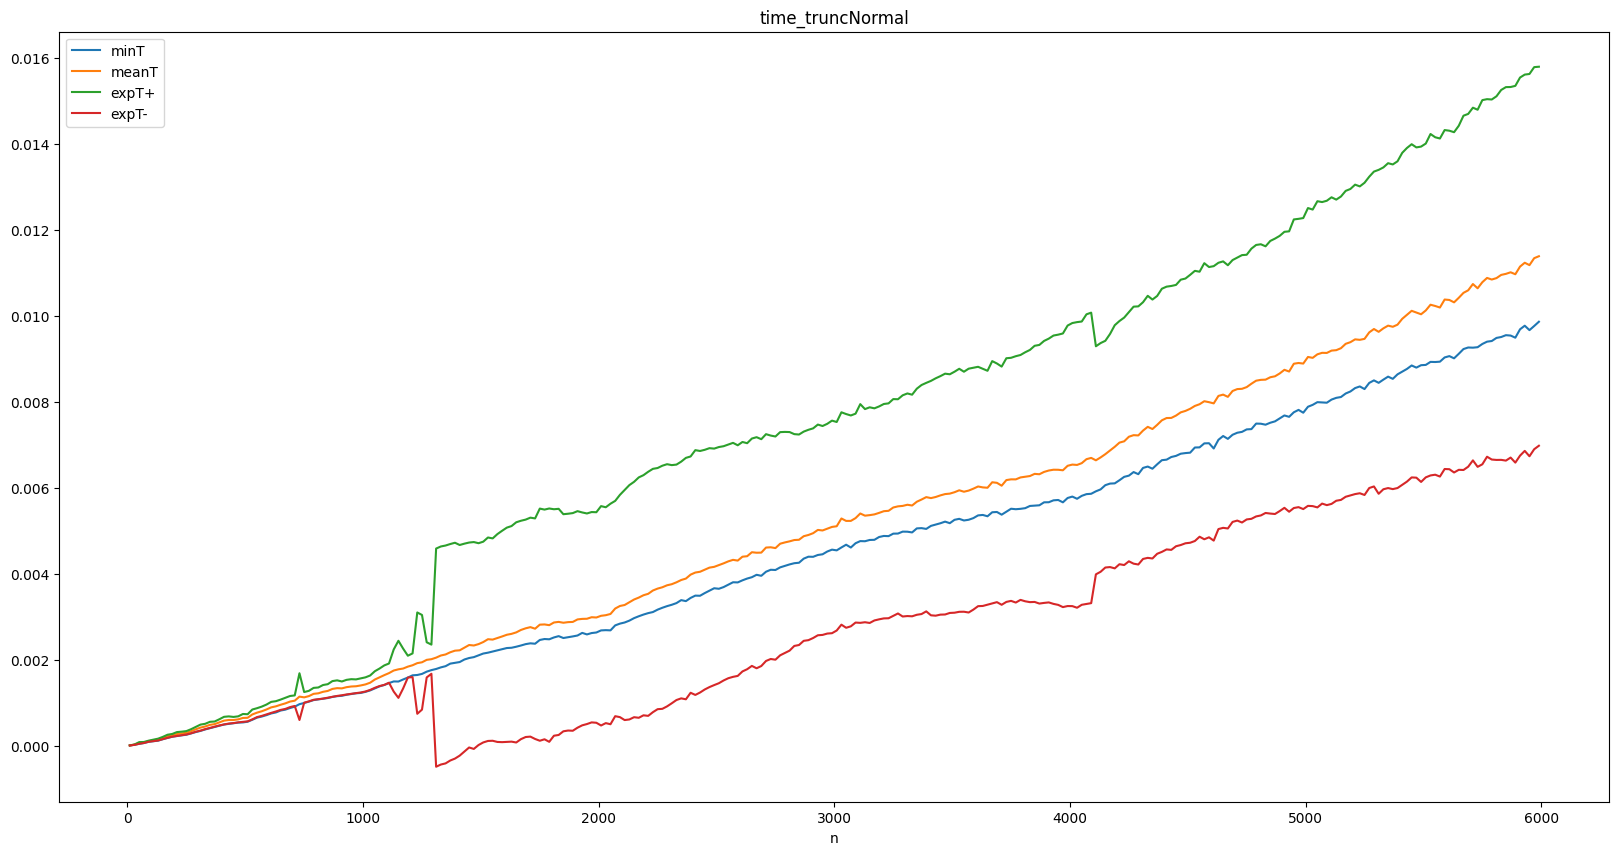

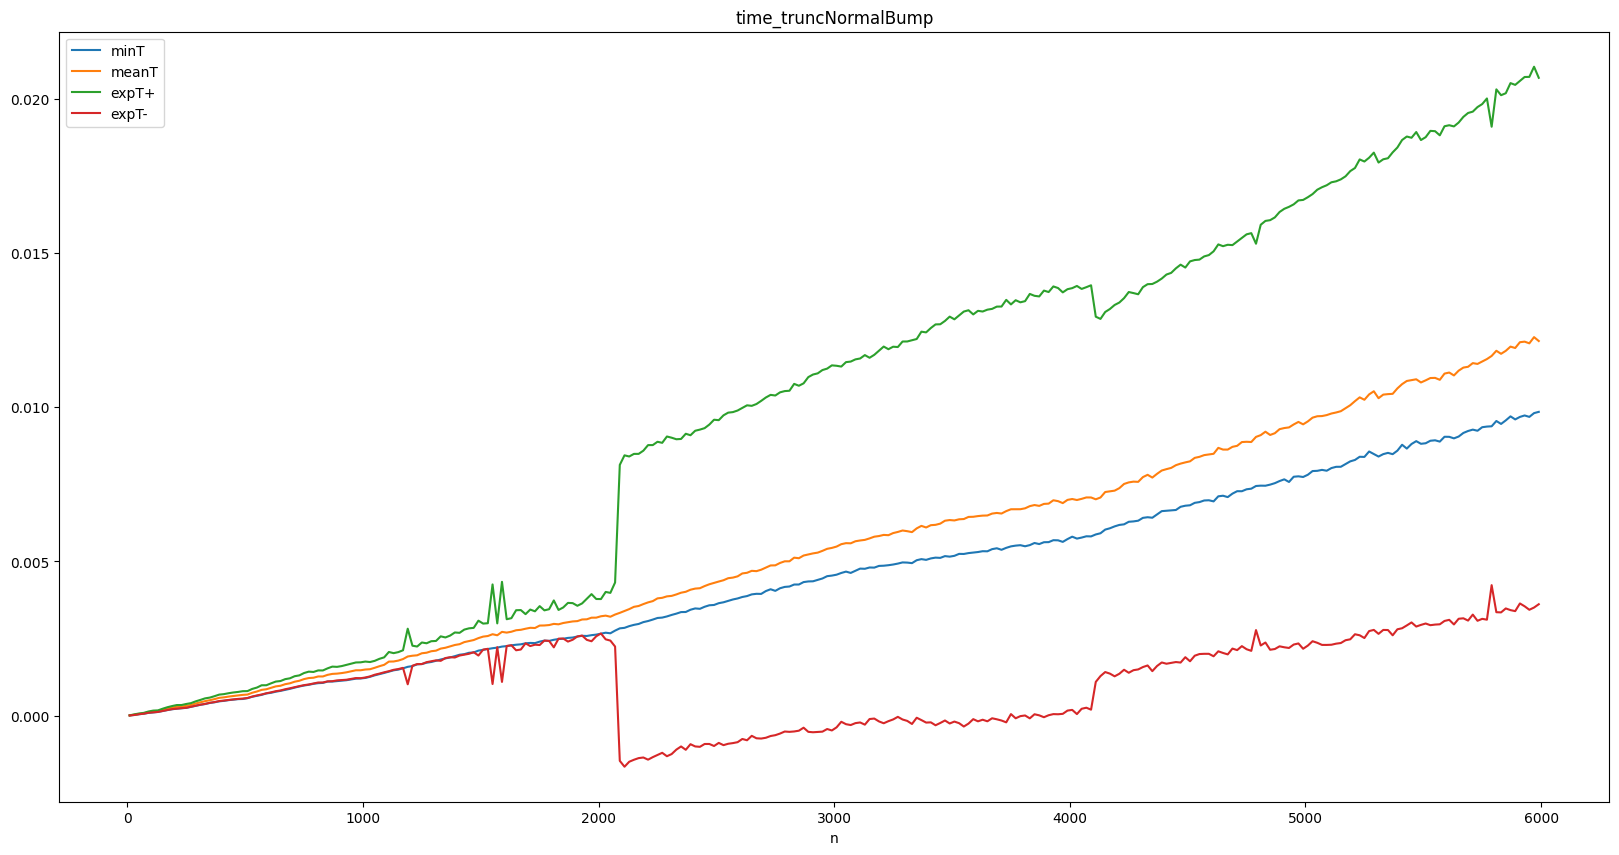

In [36]:
for dist in dists:
    data[dist]['expT+'] = data[dist]['meanT'] + data[dist]['expT']
    data[dist]['expT-'] = data[dist]['meanT'] - data[dist]['expT']
    data[dist].plot(x='n', y=['minT', 'meanT', 'expT+', 'expT-'], figsize=(20,10), title=f'time_{dist}')